In [71]:
import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
reload(cc)

<module 'calnet.calnet' from '/Users/dan/Documents/code/adesnal/calnet/calnet.py'>

In [2]:
wtdict = np.load('weights_200114a.npy',allow_pickle=True)[()]

In [9]:
wtfiles = glob.glob('weights_*.npy')

In [36]:
wtfiles[-3]

'weights_200114a.npy'

In [25]:
mdls = []
for wtfile in wtfiles:
    wtdict = np.load(wtfile,allow_pickle=True)[()]
    mdls.append(cc.Model(wtdict))

In [26]:
YY_ss = [None for imodel in mdls]
for imodel in range(len(mdls)):
    YY_ss[imodel] = dyn.compute_steady_state_Model(mdls[imodel],Niter=int(5e3))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0


/Users/dan/Documents/code/adesnal/calnet/utils.py:374: RuntimeWarning: overflow encountered in multiply
  u = mu/np.sqrt(2*s2)
/Users/dan/Documents/code/adesnal/calnet/calnet.py:51: RuntimeWarning: overflow encountered in square
  return self.rate_f(Eta,Xi**2+np.concatenate([s02 for ipixel in range(self.nS)],axis=0))
/Users/dan/Documents/code/adesnal/calnet/utils.py:543: RuntimeWarning: invalid value encountered in matmul
  return XX @ WWx + YY @ WWy
/Users/dan/Documents/code/adesnal/calnet/utils.py:374: RuntimeWarning: invalid value encountered in true_divide
  u = mu/np.sqrt(2*s2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [58]:
for imodel in (len(mdls)-3,):
    reload(dyn)
    YY_fix = dyn.compute_steady_state_Model(mdls[imodel],Niter=int(1.5e3),fix_dim=np.arange(mdls[imodel].nQ),Ny=25,dt=1e-1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


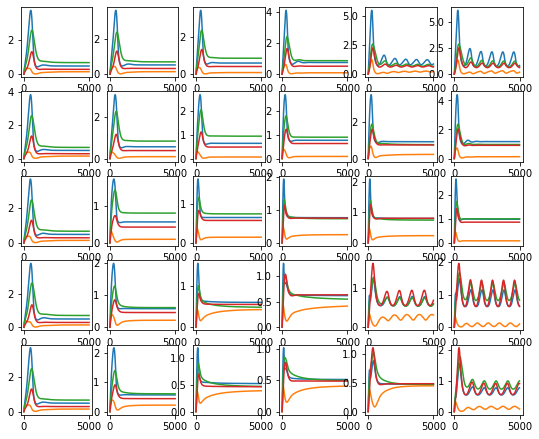

In [256]:
mag = 1.5
for imodel in range(len(mdls)-3,len(mdls)-2):
    plt.figure(figsize=(6*mag,5*mag))
    for icelltype in range(4):
        for istim in range(30):
            plt.subplot(5,6,istim+1)
            plt.plot(YY_ss[imodel][istim,:,icelltype]) #-YY_ss[imodel][istim,-1,icelltype])

In [ ]:
mag = 1.5
for imodel in range(len(mdls)-3,len(mdls)-2):
    plt.figure(figsize=(6*mag,5*mag))
    for icelltype in range(4):
        for istim in range(30):
            plt.subplot(5,6,istim+1)
            plt.plot(YY_ss[imodel][istim,:,icelltype])#-YY_ss[imodel][istim,-1,icelltype])

In [41]:
YY_fix.shape

(4, 30, 25, 1501, 8)

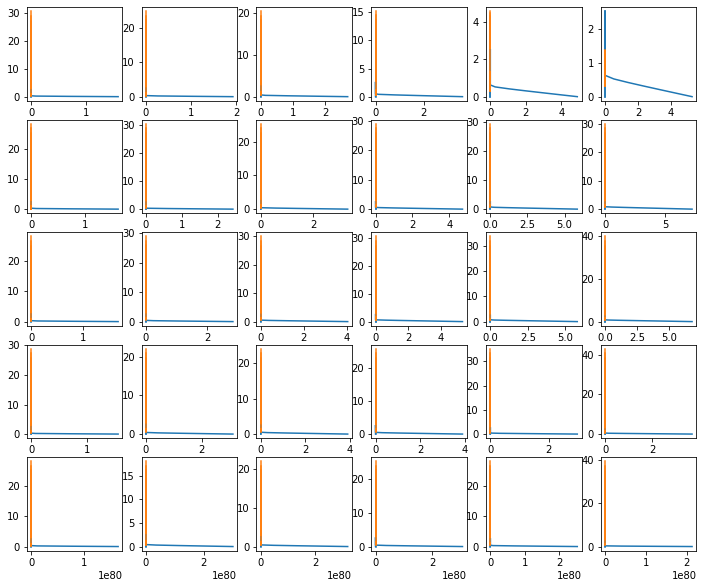

In [60]:
mag = 2
ix = 0
iy = 3
max_val = 2.5
Ny = 25
xvals = np.linspace(0,max_val,Ny)
plt.figure(figsize=(6*mag,5*mag))
for istim in range(30):
    plt.subplot(5,6,istim+1)
    for it in [-200,-100,-1]:
        plt.plot(YY_fix[iy,istim,:,it,ix],xvals,c='C0')
        plt.plot(xvals,YY_fix[ix,istim,:,it,iy],c='C1')

In [82]:
def f_basic(mu,sigma=1):
    return utils.f_miller_troyer(mu,sigma)
def run_small_sim(W,h,r0,f=f_basic,Niter=int(1e3),dt=1e-1):
    def drdt(r):
        return -r + f(r @ W + h)
    r = r0
    for t in range(Niter):
        r = r + dt*drdt(r)
    return r
    

In [253]:
# W = np.array(((1,2),(-3,-2)))
W = 2*np.array(((1,1),(-2,-1)))
# hs = [np.array((1,0.99)),np.array((1,1)),np.array((1,1.01))]
hs = [np.array((1,0.49)),np.array((1,0.75)),np.array((1,0.51))]
# h2 = np.array((1,1.25))
r0 = np.array((1,1))
nstim = 100
inputs = np.linspace(-2,2,nstim)
rs = [np.zeros((nstim,2)) for h in hs]
for iinp in range(len(hs)):
    for istim in range(nstim):
        rs[iinp][istim] = run_small_sim(W,hs[iinp]*inputs[istim],r0,f=lambda mu: utils.f_miller_troyer(mu,0.05))
        r0 = rs[iinp][istim].copy()

In [227]:
ww,vv = np.linalg.eig(W.T)

In [228]:
-h2 @ np.linalg.inv(W-1)

array([-0.5 ,  0.25])

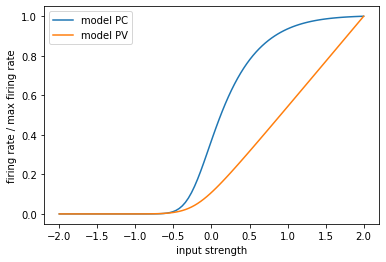

In [255]:
for iinp in (1,): #range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
    plt.legend(['model PC','model PV'])
    plt.xlabel('input strength')
    plt.ylabel('firing rate / max firing rate')
plt.savefig('figures/toy_model_pc_pv.jpg',dpi=300)

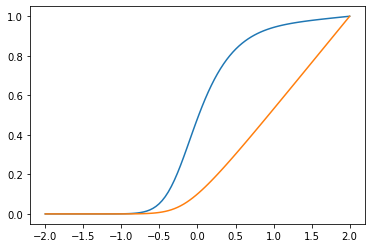

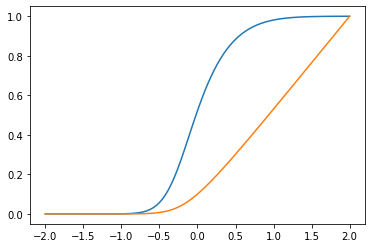

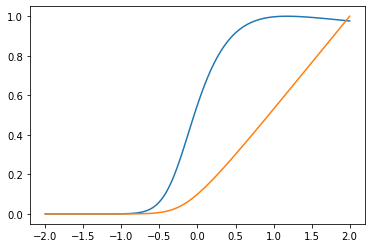

In [238]:
for iinp in range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
# plt.plot(inputs,r2)

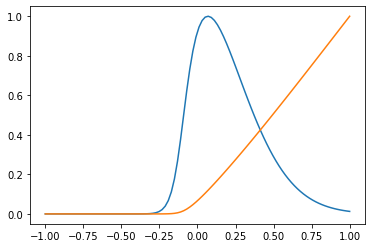

In [220]:
plt.figure()
plt.plot(inputs,r2/r2.max(0)[np.newaxis,:])

(0, 0.04)

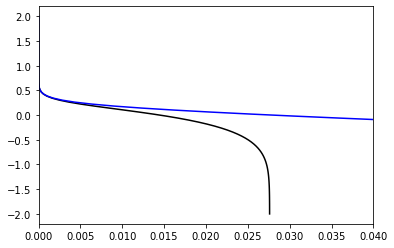

In [234]:
plt.figure()
plt.plot(r[:,0],-inputs,c='k')
plt.plot(r[:,1],-inputs,c='b')
plt.xlim((0,0.04))